In [1]:
#This Kernel will be used to determine the pricing of the 
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
# ride_results_df = pd.DataFrame.from_records(ride_results)

input_file_path = "TNP_trips_350K.csv"

# Read the CSV file into the DataFrame
ride_results_df = pd.read_csv(input_file_path)

# Convert column names to snake_case
ride_results_df.columns = ride_results_df.columns.str.lower().str.replace(' ', '_')

ride_results_df

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,...,additional_charges,trip_total,shared_trip_authorized,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location
0,5fd670ba8681717af8db2b16fcff532327f164f7,11/12/2022 06:45:00 AM,11/12/2022 07:00:00 AM,542.0,1.5,1.703106e+10,1.703106e+10,6.0,6.0,5.0,...,2.91,7.91,False,1,41.938232,-87.646782,POINT (-87.6467820813 41.938232293),41.938232,-87.646782,POINT (-87.6467820813 41.938232293)
1,0d7c0a816f611efe0d527542cd50e69422306ced,05/31/2022 06:00:00 PM,05/31/2022 06:15:00 PM,847.0,2.8,1.703183e+10,1.703108e+10,28.0,8.0,12.5,...,4.87,20.37,False,1,41.879067,-87.657005,POINT (-87.657005027 41.8790669938),41.892508,-87.626215,POINT (-87.6262149064 41.8925077809)
2,b7cf20782d69c871cb6bf21a9c5ef9071035f401,10/28/2022 06:45:00 AM,10/28/2022 07:15:00 AM,2143.0,33.6,NaN,1.703198e+10,NaN,76.0,42.5,...,33.20,86.70,False,1,NaN,NaN,NaN,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201)
3,a06fb9215324ffc2cd8a1d7d3e6b30a2b3bac591,08/08/2022 12:30:00 PM,08/08/2022 01:00:00 PM,1949.0,18.0,1.703198e+10,1.703108e+10,76.0,8.0,30.0,...,6.81,43.81,False,1,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.895033,-87.619711,POINT (-87.6197106717 41.8950334495)
4,73fd509eae177a619e83d4e42ff6f1cd5537ba94,12/19/2022 08:30:00 PM,12/19/2022 08:30:00 PM,258.0,1.1,1.703107e+10,1.703108e+10,7.0,8.0,5.0,...,4.66,9.66,False,1,41.922083,-87.634156,POINT (-87.6341560931 41.922082541),41.909496,-87.630964,POINT (-87.630963601 41.9094956686)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349995,e1b5bc059358e0e98df3c958d797ca20da50d2ca,03/24/2022 02:45:00 PM,03/24/2022 02:45:00 PM,375.0,1.6,1.703107e+10,1.703108e+10,7.0,8.0,7.5,...,4.66,15.16,False,1,41.922083,-87.634156,POINT (-87.6341560931 41.922082541),41.902788,-87.626146,POINT (-87.6261455896 41.9027880476)
349996,503f67c2e6b08530e32468a8dc544c0cdbd7b883,06/02/2022 02:30:00 PM,06/02/2022 02:45:00 PM,977.0,3.8,NaN,NaN,24.0,23.0,15.0,...,1.28,16.28,False,1,41.901207,-87.676356,POINT (-87.6763559892 41.9012069941),41.900070,-87.720918,POINT (-87.7209182385 41.9000696026)
349997,380e373293d99f6f29c64bd756ba68c7d4602b53,06/04/2022 10:15:00 PM,06/04/2022 10:45:00 PM,1873.0,8.1,NaN,NaN,7.0,60.0,35.0,...,4.44,47.44,False,1,41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),41.836150,-87.648788,POINT (-87.6487879519 41.8361501547)
349998,4db7f98bb304a9262762465d1c5e9a74061c7298,10/19/2022 12:45:00 AM,10/19/2022 12:45:00 AM,251.0,0.9,1.703107e+10,1.703106e+10,7.0,6.0,5.0,...,2.91,7.91,False,1,41.929047,-87.651311,POINT (-87.6513108767 41.9290469366),41.936237,-87.656412,POINT (-87.6564115308 41.9362371791)


In [3]:
input_file_path = "Taxi_trips_32K.csv"

# Read the CSV file into the DataFrame
taxi_results_df = pd.read_csv(input_file_path)

# Convert column names to snake_case
taxi_results_df.columns = taxi_results_df.columns.str.lower().str.replace(' ', '_')

taxi_results_df

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid__location
0,e8489b39a088ebf844047c6b0a676ca9a5173207,41b52039f81d93468b1686459508da86e96d96e6c8d715...,03/16/2022 12:15:00 PM,03/16/2022 12:30:00 PM,480.0,0.00,1.703128e+10,1.703132e+10,28.0,32.0,...,0.0,6.50,Cash,"Taxicab Insurance Agency, LLC",41.879255,-87.642649,POINT (-87.642648998 41.8792550844),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
1,95b89ee2c049cbe96789d762dda9261ba7eec391,a83d0757369e84e2567b6d31793b04221b7087c4f99083...,01/14/2022 11:30:00 AM,01/14/2022 11:45:00 AM,540.0,1.62,1.703108e+10,1.703128e+10,8.0,28.0,...,0.0,12.75,Credit Card,Flash Cab,41.892508,-87.626215,POINT (-87.6262149064 41.8925077809),41.879255,-87.642649,POINT (-87.642648998 41.8792550844)
2,fd6c5e4607ffa204edc835ab552deca30076c432,e8ebe1fb12cc70947d4031ad2982bd07dee6c4a3b7d381...,03/01/2022 01:15:00 AM,03/01/2022 01:15:00 AM,681.0,7.11,NaN,NaN,76.0,17.0,...,5.0,28.00,Credit Card,Flash Cab,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.946511,-87.806020,POINT (-87.8060200025 41.9465114202)
3,5e0120741354f6895623215570f4c60c48852c41,ff214d6d48867d32b43c8caf27613acc83d3a03a290c37...,03/28/2022 02:30:00 PM,03/28/2022 02:45:00 PM,540.0,1.10,NaN,NaN,6.0,6.0,...,0.0,6.75,Cash,Taxi Affiliation Services,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),41.944227,-87.655998,POINT (-87.6559981815 41.9442266014)
4,f710aa6f67b51c57410d6546d55ddfe806441814,bf0b987f41a8c368a072da293f9fb1aecc8a39763ab6a4...,12/31/2022 08:15:00 PM,12/31/2022 08:30:00 PM,1484.0,12.19,NaN,NaN,NaN,4.0,...,5.0,44.10,Credit Card,Flash Cab,NaN,NaN,NaN,41.975171,-87.687516,POINT (-87.6875155152 41.9751709433)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32318,06dbbee041b78489690e3392b607732e14cac808,4c658dc5e7ea935f4c3bb9a3071f509efac3e99c93f6a6...,08/17/2022 12:45:00 PM,08/17/2022 01:30:00 PM,2076.0,22.61,NaN,NaN,8.0,NaN,...,0.0,57.53,Cash,Flash Cab,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),NaN,NaN,NaN
32319,ea327414a034f3d41685add8a8b79a675dcf061b,f2b35bd8a42c347d4a147be4c9b2f6977add46e98e203a...,06/26/2022 07:30:00 AM,06/26/2022 07:45:00 AM,662.0,2.85,1.703108e+10,1.703184e+10,8.0,33.0,...,1.5,15.30,Credit Card,Sun Taxi,41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),41.849247,-87.624135,POINT (-87.6241352979 41.8492467545)
32320,46054fdc86848119afb55f715226b5b5da67163d,4cf389626b3d1df35aef815a964571fd5ea7dddda01e56...,05/19/2022 12:45:00 PM,05/19/2022 01:00:00 PM,832.0,4.45,NaN,NaN,8.0,6.0,...,1.0,15.50,Cash,Flash Cab,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.944227,-87.655998,POINT (-87.6559981815 41.9442266014)
32321,374c9a3cf1b47a6b503161272ee281e25a04a24e,3b084cc9045b3afc1c8bb8b5b76921d8e41c00494b15bd...,11/12/2022 05:45:00 PM,11/12/2022 05:45:00 PM,474.0,0.72,1.703108e+10,1.703108e+10,8.0,8.0,...,0.0,6.25,Cash,Globe Taxi,41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365)


In [7]:
combined_df = pd.concat([taxi_results_df, ride_results_df], ignore_index=True)


In [10]:
df_cleaned = combined_df.dropna(subset=['fare', 'trip_miles'])


In [11]:
df_cleaned.dtypes

trip_id                        object
taxi_id                        object
trip_start_timestamp           object
trip_end_timestamp             object
trip_seconds                  float64
trip_miles                    float64
pickup_census_tract           float64
dropoff_census_tract          float64
pickup_community_area         float64
dropoff_community_area        float64
fare                          float64
tips                          float64
tolls                         float64
extras                        float64
trip_total                    float64
payment_type                   object
company                        object
pickup_centroid_latitude      float64
pickup_centroid_longitude     float64
pickup_centroid_location       object
dropoff_centroid_latitude     float64
dropoff_centroid_longitude    float64
dropoff_centroid__location     object
tip                           float64
additional_charges            float64
shared_trip_authorized         object
trips_pooled

In [17]:
df_cleaned = df_cleaned[df_cleaned['trip_miles'] != 0]


In [43]:
df_cleaned['fare_per_mile'] = df_cleaned['fare'] / df_cleaned['trip_miles']

# Calculate the average fare per mile
average_fare_per_mile = df_cleaned['fare_per_mile'].mean()

print(f"Average fare per mile: ${average_fare_per_mile:.2f}")

Average fare per mile: $5.40


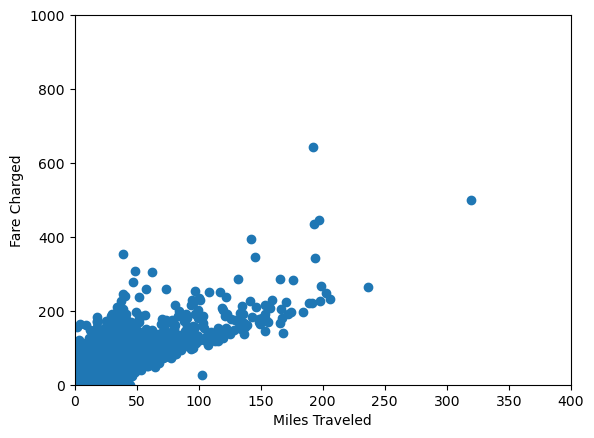

In [49]:
fare=df_cleaned['fare']
miles=df_cleaned['trip_miles']
plt.scatter(miles,fair)
x_min_limit = 0  # Replace this with your desired minimum value for the x-axis
x_max_limit = 400  # Replace this with your desired maximum value for the x-axis
y_min_limit = 0  # Replace this with your desired minimum value for the y-axis
y_max_limit = 1000  # Replace this with your desired maximum value for the y-axis

plt.xlim(x_min_limit, x_max_limit)
plt.ylim(y_min_limit, y_max_limit)
plt.xlabel("Miles Traveled")
plt.ylabel("Fare Charged")
plt.show()

In [23]:
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(miles, fare)


In [25]:
pe_fit = pe_slope * miles + pe_int

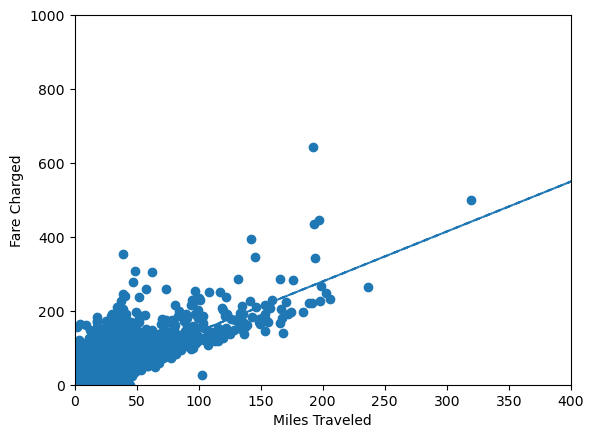

In [42]:
fare=df_cleaned['fare']
miles=df_cleaned['trip_miles']
plt.plot(miles,pe_fit,"--")
plt.scatter(miles,fair)
x_min_limit = 0  # Replace this with your desired minimum value for the x-axis
x_max_limit = 400  # Replace this with your desired maximum value for the x-axis
y_min_limit = 0  # Replace this with your desired minimum value for the y-axis
y_max_limit = 1000  # Replace this with your desired maximum value for the y-axis

plt.xlim(x_min_limit, x_max_limit)
plt.ylim(y_min_limit, y_max_limit)
plt.xlabel("Miles Traveled")
plt.ylabel("Fare Charged")
plt.show()

In [38]:

print(f"We will charge a base amount of ${pe_int:.2f} flat fee per ride, along with a rate of ${pe_slope:.2f} per mile traveled")

We will charge a base amount of $9.49 flat fee per ride, along with a rate of $1.35 per mile traveled


In [46]:
miles_traveled = list(range(31))

In [47]:
# Calculate prices based on the two pricing equations
price_equation1 = [average_fare_per_mile * miles for miles in miles_traveled]
price_equation2 = [pe_int + pe_slope * miles for miles in miles_traveled]

In [48]:
# Create the DataFrame
df = pd.DataFrame({'Miles Traveled': miles_traveled,
                   '$5.40 per Mile': price_equation1,
                   '$9.49 plus $1.35 per Mile': price_equation2})

# Print the DataFrame
print(df)

    Miles Traveled  $5.40 per Mile  $9.49 plus $1.35 per Mile
0                0        0.000000                   9.487215
1                1        5.402898                  10.837401
2                2       10.805796                  12.187587
3                3       16.208694                  13.537773
4                4       21.611592                  14.887960
5                5       27.014491                  16.238146
6                6       32.417389                  17.588332
7                7       37.820287                  18.938518
8                8       43.223185                  20.288704
9                9       48.626083                  21.638891
10              10       54.028981                  22.989077
11              11       59.431879                  24.339263
12              12       64.834777                  25.689449
13              13       70.237676                  27.039635
14              14       75.640574                  28.389822
15      